In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

Data Preprocessing

In [2]:
#Reading the dataset
data = pd.DataFrame(pd.read_csv("IRIS.csv"))

In [3]:
#sample of dataset
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#statistical analysis about data
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Data Cleaning

In [6]:
#checking null values in columns of dataset
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Data Explroning

In [7]:
print("target labels",data['species'].unique())

target labels ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


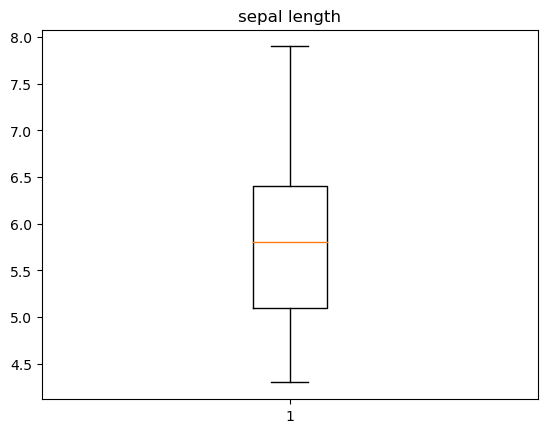

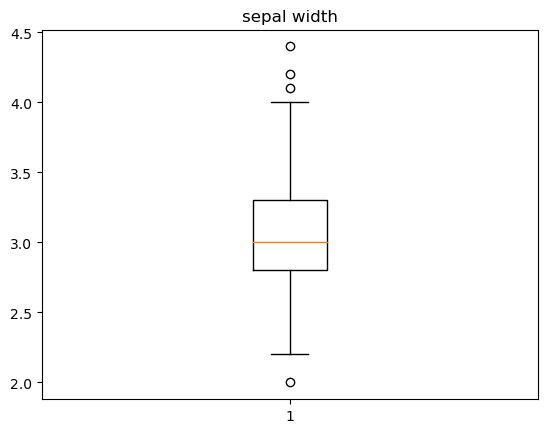

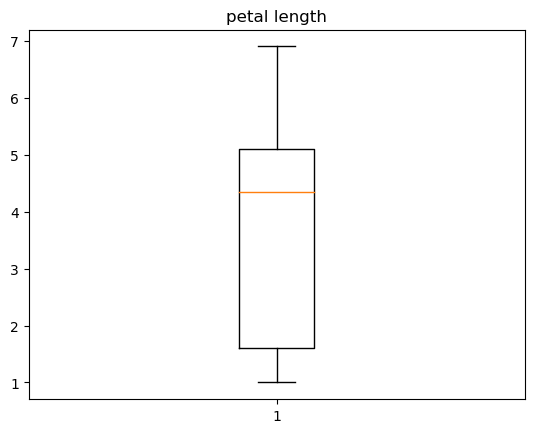

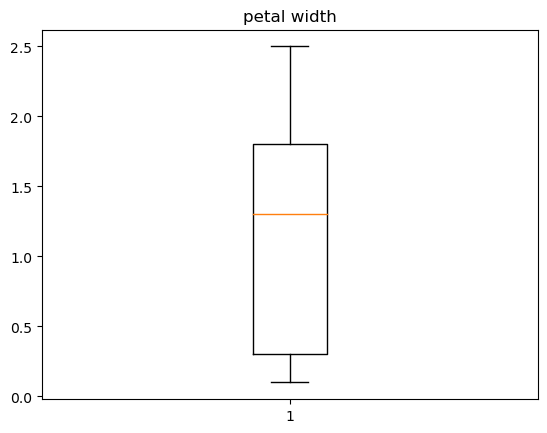

In [8]:

import matplotlib.pyplot as plt

plt.figure(1)
plt.title("sepal length")
plt.boxplot([data['sepal_length']])

plt.figure(2)
plt.title("sepal width")
plt.boxplot([data['sepal_width']])

plt.figure(3)
plt.title("petal length")
plt.boxplot(data['petal_length'])

plt.figure(4)
plt.title("petal width")
plt.boxplot(data['petal_width'])
plt.show()

Model Building

In [9]:
#separating feature and target varibles in iris dataset
x=data.drop('species',axis=1)
y=data['species']

In [10]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [12]:
#splitting x and y into training and testing datasets
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [13]:
#KNN Classifier 
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [14]:
#training the model using KNN classifier algorithm
KNN.fit(x_train,y_train)

KNeighborsClassifier()

Model Evaluation

In [15]:
prediction = KNN.predict(x_test)

C:\Users\Premnath Bhalke\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [16]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9777777777777777

In [17]:
#Detailed Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [18]:
#testing the model on new input dataset
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
predictions = KNN.predict(X_new)
print(predictions)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


C:\Users\Premnath Bhalke\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Premnath Bhalke\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [19]:
# Save the model
import pickle
with open('KNN.pickle', 'wb') as f:
    pickle.dump(KNN, f)
# Load the model
with open('KNN.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

C:\Users\Premnath Bhalke\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Premnath Bhalke\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)